In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
# The statistical module used to run chi square test
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [32]:
weather_df = pd.read_csv("weatherdatacsv.csv")
weather_df["Temp"]=pd.to_numeric(weather_df["Temp"], errors='coerce')
weather_df = weather_df.dropna()

In [33]:
death_df = pd.read_csv("masterdeathfilenew.csv")
death_df.head()


,County,Month,Year,Deaths,AgeGroup,Unnamed: 5,Unnamed: 6
0,Hennepin,1.0,2007.0,11.0,1,NaN,NaN
1,Hennepin,5.0,2007.0,11.0,1,NaN,NaN
2,Hennepin,6.0,2007.0,11.0,1,NaN,NaN
3,Hennepin,7.0,2007.0,11.0,1,NaN,NaN
4,Hennepin,10.0,2007.0,13.0,1,NaN,NaN


In [36]:
left_key=["County", "Year", "Month"]
right_key = ["County", "Year", "Month"]
result_df=death_df.merge(weather_df, left_on=left_key, right_on=right_key, how='inner')
result_df.head()
result_df.to_csv("resultsfile.csv")

County        6147
Month         6147
Year          6147
Deaths        6147
AgeGroup      6147
Unnamed: 5       0
Unnamed: 6       0
City          6147
Temp          6147
dtype: int64

In [55]:
#Counties: Hennepin, St Louis (Duluth), Freeborn (Albert Lea), Clay(Moorhead)
group1=result_df.loc[(result_df["AgeGroup"]=="85+") & (result_df["County"]=="St. Louis"),:]
group2 = result_df.loc[(result_df["AgeGroup"]=="75-84") & (result_df["County"]=="St. Louis"),:]
group3 = result_df.loc[(result_df["AgeGroup"]=="65-74") & (result_df["County"]=="St. Louis"),:]
group4 = result_df.loc[(result_df["AgeGroup"]=="55-64") & (result_df["County"]=="St. Louis"),:]
group5 = result_df.loc[(result_df["AgeGroup"]=="45-54") & (result_df["County"]=="St. Louis"),:]
#group6 = result_df.loc[(result_df["AgeGroup"]=="35-44") & (result_df["County"]=="Clay"),:]
#group7 = result_df.loc[(result_df["AgeGroup"]=="25-34") & (result_df["County"]=="Clay"),:]
#group8 = result_df.loc[(result_df["AgeGroup"]=="15-24") & (result_df["County"]=="Clay"),:]
group2.head()

,County,Month,Year,Deaths,AgeGroup,Unnamed: 5,Unnamed: 6,City,Temp


C:\Users\llreb\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\llreb\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\llreb\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\llreb\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\llreb\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\llreb\Anaconda3\envs\PythonDa

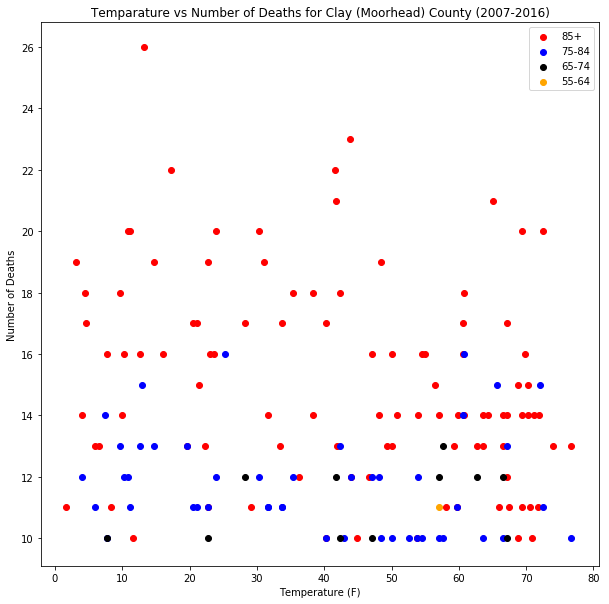

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(x=group1["Temp"], y=group1["Deaths"], color = "red", label = "85+")
plt.scatter(x=group2["Temp"], y=group2["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group3["Temp"], y=group3["Deaths"], color = "black",label = "65-74")
plt.scatter(x=group4["Temp"], y=group4["Deaths"], color = "orange",label = "55-64")
plt.scatter(x=group5["Temp"], y=group5["Deaths"], color = "purple",label = "45-54")
#plt.scatter(x=group6["Temp"], y=group6["Deaths"], color = "green",label = "35-44")
#plt.scatter(x=group7["Temp"], y=group7["Deaths"], color = "brown",label = "25-34")
#plt.scatter(x=group8["Temp"], y=group8["Deaths"], color = "yellow",label = "15-24")
(slope1, intercept1, residual1, pvalue1, stderr1) = linregress(group1["Temp"], group1["Deaths"])
fit1 = slope1 * group1["Temp"] + intercept1
#plt.plot(group1["Temp"], fit1, 'red')
(slope2, intercept2, residual2, pvalue2, stderr2) = linregress(group2["Temp"], group2["Deaths"])
fit2 = slope2 * group2["Temp"] + intercept2
#plt.plot(group2["Temp"], fit2, 'blue')
(slope3, intercept3, residual3, pvalue3, stderr3) = linregress(group3["Temp"], group3["Deaths"])
fit3 = slope3 * group3["Temp"] + intercept3
#plt.plot(group3["Temp"], fit3, 'black')
(slope4, intercept4, residual4, pvalue4, stderr4) = linregress(group4["Temp"], group4["Deaths"])
fit4 = slope4 * group4["Temp"] + intercept4
#plt.plot(group4["Temp"], fit4, 'orange')
(slope5, intercept5, residual5, pvalue5, stderr5) = linregress(group5["Temp"], group5["Deaths"])
fit5 = slope5 * group5["Temp"] + intercept5
#plt.plot(group5["Temp"], fit5, 'purple')
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Deaths")
plt.title("Temparature vs Number of Deaths for St Louis (Duluth) County (2007-2016)")
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("StLouisByAge.png")
plt.show()

In [13]:
print(f"P-value for 85+: {pvalue1} Standard Error: {stderr1}")
print(f"P-value for 75-84: {pvalue2} Standard Error: {stderr2}")
print(f"P-value for 65-74: {pvalue3} Standard Error: {stderr3}")
print(f"P-value for 55-64: {pvalue4} Standard Error: {stderr4}")
print(f"P-value for 45-54: {pvalue5} Standard Error: {stderr5}")

P-value for 85+: 1.886558866378881e-12 Standard Error: 0.11986851024985566
P-value for 75-84: 3.4828548941288334e-12 Standard Error: 0.06143813771961316
P-value for 65-74: 0.0023463837076098293 Standard Error: 0.06288370419280681
P-value for 55-64: 0.000675787745056909 Standard Error: 0.04324366616372381
P-value for 45-54: 0.5945932837497039 Standard Error: 0.03184923950654447


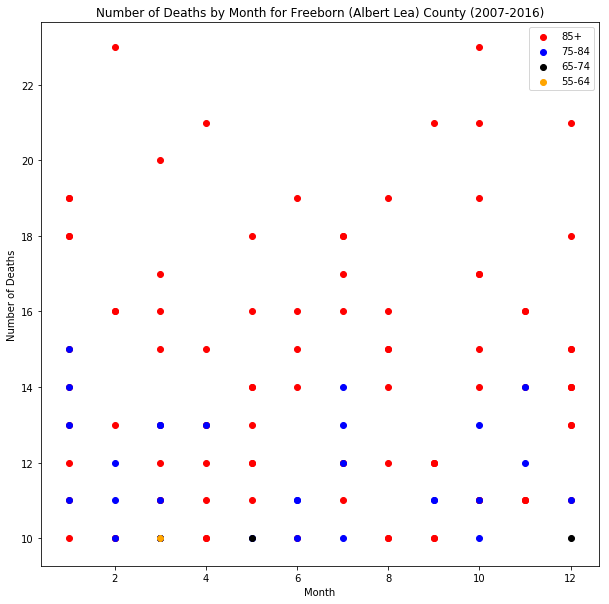

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(x=group1["Month"], y=group1["Deaths"], color = "red", label = "85+")
plt.scatter(x=group2["Month"], y=group2["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group3["Month"], y=group3["Deaths"], color = "black",label = "65-74")
plt.scatter(x=group4["Month"], y=group4["Deaths"], color = "orange",label = "55-64")
#plt.scatter(x=group5["Month"], y=group5["Deaths"], color = "purple",label = "45-54")
#plt.scatter(x=group6["Month"], y=group6["Deaths"], color = "green",label = "35-44")
#plt.scatter(x=group7["Month"], y=group7["Deaths"], color = "brown",label = "25-34")
#plt.scatter(x=group8["Month"], y=group8["Deaths"], color = "yellow",label = "15-24")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.title("Number of Deaths by Month for St Louis (Duluth)  County (2007-2016)")
plt.legend(loc="best")
plt.savefig("StLouisByMonth.png")
plt.show()

In [18]:
mn_temp= weather_df.groupby(["Year", "Month"], as_index=False)["Temp"].mean()
mn_death= death_df.groupby(["Year", "Month","AgeGroup"], as_index=False)["Deaths"].sum()
left_key=["Year", "Month"]
right_key = ["Year", "Month"]
mn_df=mn_death.merge(mn_temp, on = ["Year", "Month"], how='inner')
mn_df.head()

,Year,Month,AgeGroup,Deaths,Temp
0,2007.0,1.0,1,22.0,16.822222
1,2007.0,1.0,15-24,10.0,16.822222
2,2007.0,1.0,35-44,16.0,16.822222
3,2007.0,1.0,45-54,107.0,16.822222
4,2007.0,1.0,55-64,197.0,16.822222


In [19]:
group10=mn_df.loc[(mn_df["AgeGroup"]=="85+"),:]
group20 = mn_df.loc[(mn_df["AgeGroup"]=="75-84"),:]
group30 = mn_df.loc[(mn_df["AgeGroup"]=="65-74"),:]
group40 = mn_df.loc[(mn_df["AgeGroup"]=="55-64"),:]
group50 = mn_df.loc[(mn_df["AgeGroup"]=="45-54"),:]
group60 = mn_df.loc[(mn_df["AgeGroup"]=="35-44"),:]
group70 = mn_df.loc[(mn_df["AgeGroup"]=="25-34"),:]
group80 = mn_df.loc[(mn_df["AgeGroup"]=="15-24"),:]

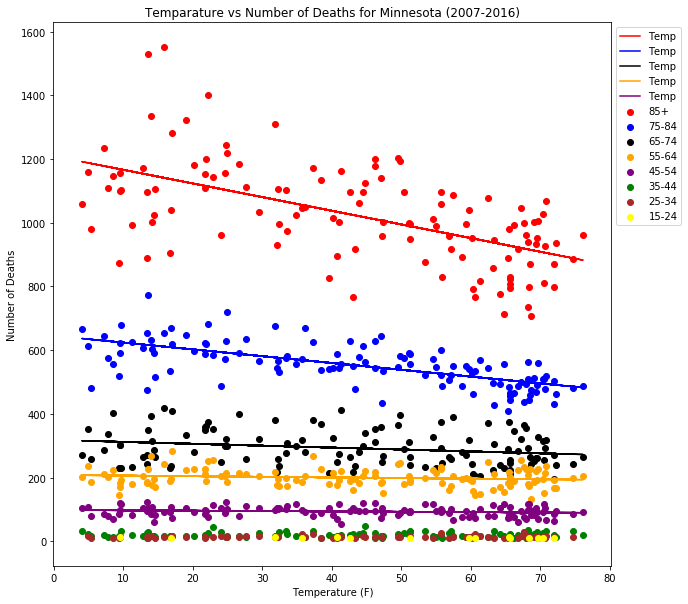

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(x=group10["Temp"], y=group10["Deaths"], color = "red", label = "85+")
plt.scatter(x=group20["Temp"], y=group20["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group30["Temp"], y=group30["Deaths"], color = "black",label = "65-74")
plt.scatter(x=group40["Temp"], y=group40["Deaths"], color = "orange",label = "55-64")
plt.scatter(x=group50["Temp"], y=group50["Deaths"], color = "purple",label = "45-54")
plt.scatter(x=group60["Temp"], y=group60["Deaths"], color = "green",label = "35-44")
plt.scatter(x=group70["Temp"], y=group70["Deaths"], color = "brown",label = "25-34")
plt.scatter(x=group80["Temp"], y=group80["Deaths"], color = "yellow",label = "15-24")
(slope10, intercept10, residual10, pvalue10, stderr10) = linregress(group10["Temp"], group10["Deaths"])
fit10 = slope10 * group10["Temp"] + intercept10
plt.plot(group10["Temp"], fit10, 'red')
(slope20, intercept20, residual20, pvalue20, stderr20) = linregress(group20["Temp"], group20["Deaths"])
fit20 = slope20 * group20["Temp"] + intercept20
plt.plot(group20["Temp"], fit20, 'blue')
(slope30, intercept30, residual30, pvalue30, stderr30) = linregress(group30["Temp"], group30["Deaths"])
fit30 = slope30 * group30["Temp"] + intercept30
plt.plot(group30["Temp"], fit30, 'black')
(slope40, intercept40, residual40, pvalue40, stderr40) = linregress(group40["Temp"], group40["Deaths"])
fit40 = slope40 * group40["Temp"] + intercept40
plt.plot(group40["Temp"], fit40, 'orange')
(slope50, intercept50, residual50, pvalue50, stderr50) = linregress(group50["Temp"], group50["Deaths"])
fit50 = slope50 * group50["Temp"] + intercept50
plt.plot(group50["Temp"], fit50, 'purple')

plt.xlabel("Temperature (F)")
plt.ylabel("Number of Deaths")
plt.title("Temparature vs Number of Deaths for Minnesota (2007-2016)")
plt.legend(bbox_to_anchor=(1, 1))

plt.savefig("MinnesotaByAge.png")
plt.show()

In [24]:
print(f"Linear regression p-value for 85+: {pvalue10}")
print(f"Linear regression p-value for 75-84: {pvalue20}")
print(f"Linear regression p-value for 65-74: {pvalue30}")
print(f"Linear regression p-value for 55-64: {pvalue40}")
print(f"Linear regression p-value for 45-54: {pvalue50}")

Linear regression p-value for 85+: 2.0856397505090483e-12
Linear regression p-value for 75-84: 1.499808106007286e-16
Linear regression p-value for 65-74: 0.010716764113832142
Linear regression p-value for 55-64: 0.10703396295463072
Linear regression p-value for 45-54: 0.08409696384542671


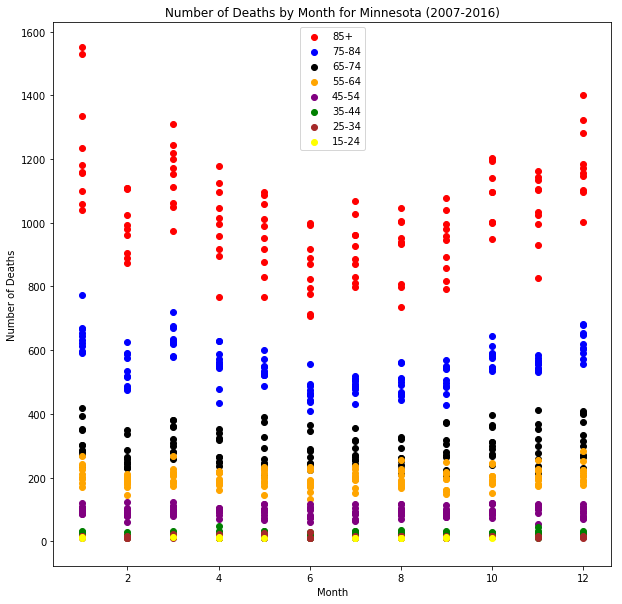

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(x=group10["Month"], y=group10["Deaths"], color = "red", label = "85+")
plt.scatter(x=group20["Month"], y=group20["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group30["Month"], y=group30["Deaths"], color = "black",label = "65-74")
plt.scatter(x=group40["Month"], y=group40["Deaths"], color = "orange",label = "55-64")
plt.scatter(x=group50["Month"], y=group50["Deaths"], color = "purple",label = "45-54")
plt.scatter(x=group60["Month"], y=group60["Deaths"], color = "green",label = "35-44")
plt.scatter(x=group70["Month"], y=group70["Deaths"], color = "brown",label = "25-34")
plt.scatter(x=group80["Month"], y=group80["Deaths"], color = "yellow",label = "15-24")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.title("Number of Deaths by Month for Minnesota (2007-2016)")
plt.legend(loc="best")

plt.savefig("MinnesotaByMonth.png")
plt.show()